###LOADING THE DATASET

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [4]:
fake_news_df =pd.read_csv("/content/Fake.csv")
true_news_df =pd.read_csv("/content/True.csv")

In [5]:
fake_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
true_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
fake_news_df['label'] = 'Fake'
true_news_df['label'] = 'True'

combined_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

In [8]:
 combined_df['label'].value_counts()

,count
label,
Fake,23481
True,21417


###EDA

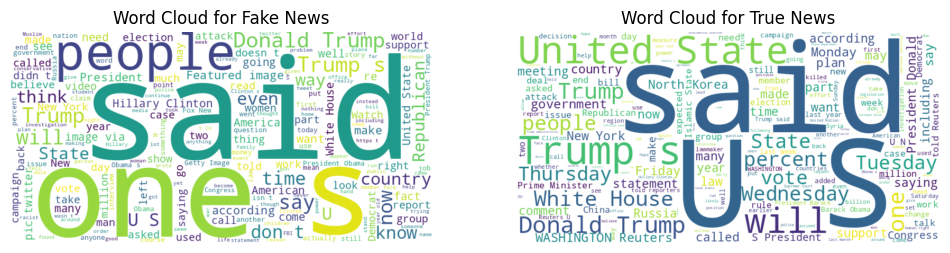

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fake_news_text = ' '.join(combined_df[combined_df['label'] == 'Fake']['text'].astype(str))
true_news_text = ' '.join(combined_df[combined_df['label'] == 'True']['text'].astype(str))

fake_news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)
true_news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_news_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(true_news_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')

plt.show()

In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

fake_news_words = combined_df[combined_df['label'] == 'Fake']['text'].astype(str).apply(preprocess_text).explode()
true_news_words = combined_df[combined_df['label'] == 'True']['text'].astype(str).apply(preprocess_text).explode()

fake_news_word_counts = Counter(fake_news_words)
true_news_word_counts = Counter(true_news_words)

print("Most Common Words in Fake News:")
print(fake_news_word_counts.most_common(10))
print("\nMost Common Words in True News:")
print(true_news_word_counts.most_common(10))

Most Common Words in Fake News:
[('trump', 73422), ('said', 31008), ('people', 25941), ('president', 25495), ('would', 23420), ('one', 22865), ('us', 22005), ('clinton', 17957), ('obama', 17760), ('like', 17596)]

Most Common Words in True News:
[('said', 99017), ('trump', 42061), ('us', 40847), ('would', 31418), ('reuters', 28306), ('president', 25223), ('state', 18547), ('government', 17851), ('new', 16712), ('house', 16294)]


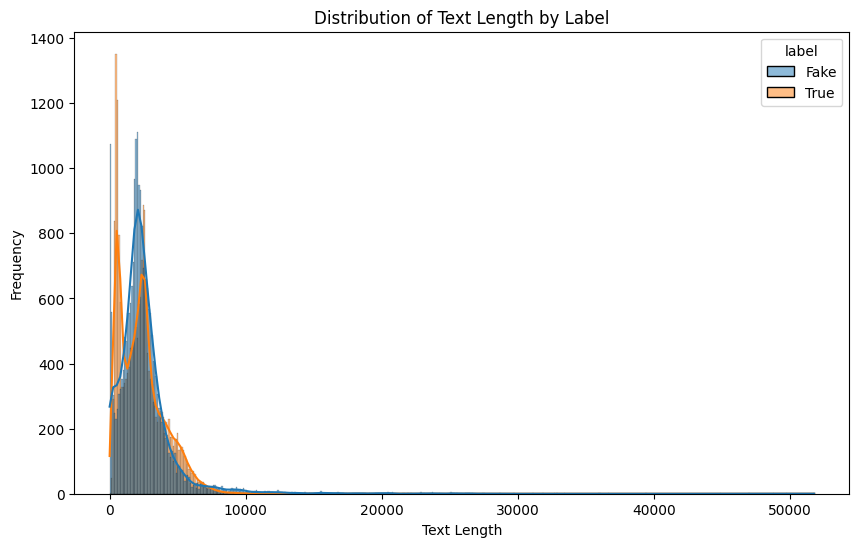


Descriptive Statistics of Text Length by Label:
         count         mean          std  min     25%     50%     75%      max
label                                                                         
Fake   23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0  51794.0
True   21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0  29781.0


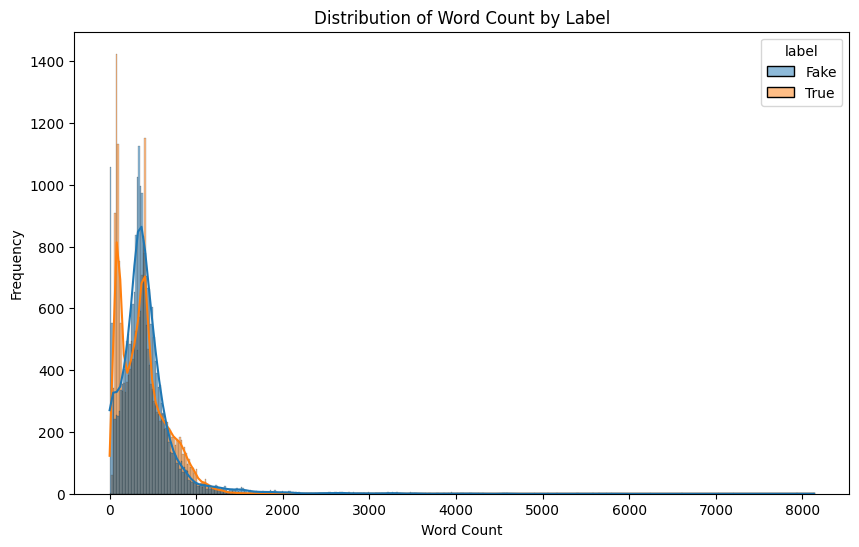


Descriptive Statistics of Word Count by Label:
         count        mean         std  min    25%    50%    75%     max
label                                                                   
Fake   23481.0  423.197905  408.388890  0.0  240.0  363.0  506.0  8135.0
True   21417.0  385.640099  274.006204  0.0  148.0  359.0  525.0  5172.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the length of the news articles
combined_df['text_length'] = combined_df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(combined_df, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print("\nDescriptive Statistics of Text Length by Label:")
print(combined_df.groupby('label')['text_length'].describe())

# Distribution of the number of words in the news articles
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(combined_df, x='word_count', hue='label', kde=True)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

print("\nDescriptive Statistics of Word Count by Label:")
print(combined_df.groupby('label')['word_count'].describe())

###SVM

Accuracy on the Test Set: 0.9937


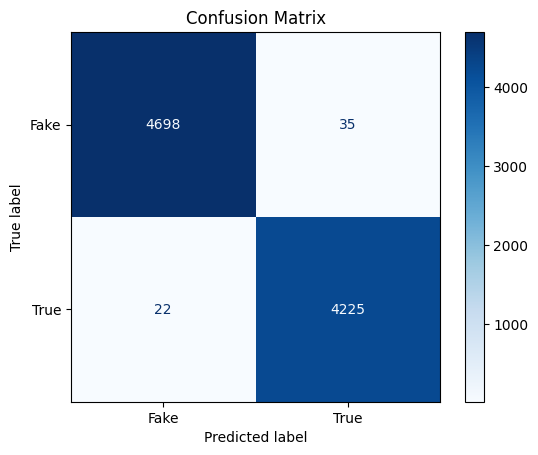


Class-wise Performance (based on normalized confusion matrix):
Percentage of correctly predicted 'Fake' news: 0.9926
Percentage of correctly predicted 'True' news: 0.9948

The 'True' class was predicted better than the 'Fake' class.

The 'Fake' class was predicted worse than the 'True' class.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Combine 'title' and 'text' columns
combined_df['combined_text'] = combined_df['title'].fillna('') + ' ' + combined_df['text'].fillna('')

# Prepare the data
X = combined_df['combined_text']
y = combined_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the Test Set: {accuracy:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Fake', 'True'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Analyze which class is predicted better and worse
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, None]

fake_accuracy = cm_normalized[0, 0]
true_accuracy = cm_normalized[1, 1]

print("\nClass-wise Performance (based on normalized confusion matrix):")
print(f"Percentage of correctly predicted 'Fake' news: {fake_accuracy:.4f}")
print(f"Percentage of correctly predicted 'True' news: {true_accuracy:.4f}")

if fake_accuracy > true_accuracy:
    print("\nThe 'Fake' class was predicted better than the 'True' class.")
elif true_accuracy > fake_accuracy:
    print("\nThe 'True' class was predicted better than the 'Fake' class.")
else:
    print("\nThe prediction performance for both classes is similar.")

# Identify which class is predicted worse (higher misclassification rate)
fake_misclassification = 1 - fake_accuracy
true_misclassification = 1 - true_accuracy

if fake_misclassification > true_misclassification:
    print("\nThe 'Fake' class was predicted worse than the 'True' class.")
elif true_misclassification > fake_misclassification:
    print("\nThe 'True' class was predicted worse than the 'Fake' class.")
else:
    print("\nThe misclassification rate is similar for both classes.")

In [13]:
# Create a DataFrame with the test data and predictions
predictions_df = pd.DataFrame({'text': X_test, 'actual_label': y_test, 'predicted_label': y_pred})

# Filter for false positives (Fake classified as True)
false_positives = predictions_df[(predictions_df['actual_label'] == 'Fake') & (predictions_df['predicted_label'] == 'True')]

# Filter for false negatives (True classified as Fake)
false_negatives = predictions_df[(predictions_df['actual_label'] == 'True') & (predictions_df['predicted_label'] == 'Fake')]

print("\nExamples of False Positives (Fake News Classified as True):\n")
if not false_positives.empty:
    for index, row in false_positives.head(5).iterrows():
        print(f"Text: {row['text'][:200]}...")
        print(f"Actual Label: {row['actual_label']}")
        print(f"Predicted Label: {row['predicted_label']}")
        print("-" * 50)
else:
    print("No false positives found.")

print("\nExamples of False Negatives (True News Classified as Fake):\n")
if not false_negatives.empty:
    for index, row in false_negatives.head(5).iterrows():
        print(f"Text: {row['text'][:200]}...")
        print(f"Actual Label: {row['actual_label']}")
        print(f"Predicted Label: {row['predicted_label']}")
        print("-" * 50)
else:
    print("No false negatives found.")


Examples of False Positives (Fake News Classified as True):

Text:  Energy Department To Close Office Of International Climate And Technology In response to the U.S. withdrawing from the Paris climate agreement earlier this month, the Energy Department is shutting do...
Actual Label: Fake
Predicted Label: True
--------------------------------------------------
Text: PALESTINIANS STEPPING UP STABBINGS: Dramatic Video Shows Palestinian Man Stabbing Israeli Police Officers…Israeli Teen Stabbed On Bicycle ***Warning*** Graphic photo and videoThank goodness Israeli s ...
Actual Label: Fake
Predicted Label: True
--------------------------------------------------
Text: DISGUSTING! SEATTLE MAYOR WHO Announced He’s Suing Trump Over Sanctuary City Exec Order Is Accused Of Raping 15-Yr Old Boy, Two Others Ed Murray has just been accused of alleged sexual assault of teen...
Actual Label: Fake
Predicted Label: True
--------------------------------------------------
Text: N. KOREA’S LATEST MISSILE 